# ROB311 - Machine Learning for Robotics
## TP1 - KNN 
### Cancer Diagnosis Prediction

Mateus Lopes Ricci 

Matheus Melo Monteverde


# Functions

## Import

In [27]:
import numpy as np
import pandas as pd
import random
import warnings
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import style
from copy import deepcopy
style.use('fivethirtyeight')

## Reading data

In [28]:
def read_Haberman(name):
    df = pd.read_csv(name)
    #df.drop(['A'], 1, inplace=True)    
    #df.drop(['YO'], 1, inplace=True)
    full_data = df.astype(float).values.tolist()
    empty_set= {1:[], 2:[]}                                    # Declaration of empty dictionary

    return full_data, empty_set

def read_BCW(name):
    df = pd.read_csv(name)
    ### Read o file with data of Breast Cancer and replace missing data so that it does not interfear in the KNN
    df.replace('?',-99999,inplace=True)
    df.drop(['ID'], 1, inplace=True)
    full_data = df.astype(float).values.tolist()
    empty_set= {2:[], 4:[]}                                    # Declaration of empty dictionary
    
    return full_data, empty_set

## Dataset transformation

In [29]:
def dataset(full_data, empty_set, test_size):
    random.shuffle(full_data)                                   # Shuffle data 
    train_data = full_data[:-int(test_size*len(full_data))]     # Attribute of (1 - test_size) of full data for training  
    test_data = full_data[-int(test_size*len(full_data)):]      # Attribute (test_size) of full data for testing
    train_set = deepcopy(empty_set)                               # Declaration of dictionary for training set
    test_set = deepcopy(empty_set)                                # Declaration of dictionary for testing set  

    ### Fill training dictionary with data
    for i in train_data:
        train_set[i[-1]].append(i[:-1])                         

    ### Fill testing dictionary with data
    for i in test_data:
            test_set[i[-1]].append(i[:-1]) 

    return train_set, test_set 

## KNN Algorithm

In [30]:
def KNN(data,predict,k=3):
    if len(data) >= k:
        warning.warn('K is lower than data!') 

    distances = []

    for Class in data:
        for features in data[Class]:
            euc_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euc_distance,Class])

    votes = [i[1] for i in sorted(distances)[:k]]

    result = Counter(votes).most_common(1)[0][0]
    
    return result

## Accuracies Calculation

In [31]:
def accuracy_KNN(train_set, test_set):
    
    ### Declaration of auxiliary variables
    correct = 0
    total = 0
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    
    ### Prediction and Validation of results of KNN function with real results
    for Class in test_set:
        for test_data in test_set[Class]:
            
            result = KNN(train_set, test_data, k=5)
            
            ### Calculation of true Positives
            if Class == result and Class == 1:
                tp += 1
                correct += 1

            ### Calculation of true Negatives    
            elif Class == result and Class == 2:
                tn += 1
                correct += 1

            ### Calculation of false Positives        
            elif Class != result and Class == 1:
                fp += 1

            ### Calculation of false Negatives    
            elif Class != result and Class == 2:
                fn += 1   

            total += 1

    return total, correct, tp, tn, fp, fn

def accuracies_KNN(full_data, empty_set, test_size, N):

    ### Declaration of Vectors to be utilized 
    accuracies = []                                                 # Vector of accuracy of each training with different shuffle
    tps = []                                                        # Vector rate of true positives of each training with different shuffle 
    tns = []                                                        # Vector rate of true negatives of each training with different shuffle
    fps = []                                                        # Vector rate of false positives of each training with different shuffle
    fns = []                                                        # Vector rate of false negatives of each training with different shuffle

    ### Perform KNN N times
    for j in range(N):
        
        ### Fill dataset
        train_set, test_set = dataset(full_data, empty_set, test_size)
        
        ### Get accuracies 
        total, correct, tp, tn, fp, fn = accuracy_KNN(train_set, test_set)

        print(j+1,'/',N,'Accuracy: ',correct/total)
        accuracies.append(correct/total)                            # Fill vector of accuracy of each training with current shuffle
        tps.append(tp/total)                                        # Fill vector rate of true positives of each training with current shuffle    
        tns.append(tn/total)                                        # Fill vector rate of true negatives of each training with current shuffle
        fps.append(fp/total)                                        # Fill vector rate of false positives of each training with current shuffle
        fns.append(fn/total)                                        # Fill vector rate of false negatives of each training with current shuffle

    return accuracies, tps, tns, fps, fns

## Results

In [32]:
def Results(accuracies,tps,tns,fps,fns):
    ### Printing Results
    print('\nMean Accuracy: ',sum(accuracies)/len(accuracies))
    print('Standard Deviation: ',np.std(accuracies))
    print("True Positive: ", sum(tps)/len(tps))
    print("True Negative: ", sum(tns)/len(tns))
    print("False Positive: ", sum(fps)/len(fps))
    print("False Negative: ", sum(fns)/len(fns))

def Plot_KNN(dataset):
    ### Plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in dataset:
        for ii in dataset[i]: 
            if i == 1:
                ax.scatter(ii[0],ii[1],ii[2], s=100,  color = 'k', marker='o')

            else:
                ax.scatter(ii[0],ii[1],ii[2], s=100,  color = 'r', marker='o'   )

    ax.set_xlabel('Age')
    ax.set_ylabel('Year of Operation')
    ax.set_zlabel('Number of Positive Axillary Nodes')
                
    plt.show()

# Main

In [33]:
### Haberman
full_data, empty_set = read_Haberman('datasets/haberman.data')

### Wisconsin
#full_data, empty_set = read_BCW('datasets/breast-cancer-wisconsin.data')

### Parameters of the analysis
test_size = 0.2                                                 # Proportion of the samples utilized for test
N = 20                                                         # Numbers of trainings executed through different data shuffle

### Get accuracies from N KNN evaluations
accuracies, tps, tns, fps, fns = accuracies_KNN(full_data, empty_set, test_size, N)

### Print Results
Results(accuracies,tps,tns,fps,fns)


1 / 20 Accuracy:  0.7704918032786885
2 / 20 Accuracy:  0.7213114754098361
3 / 20 Accuracy:  0.7213114754098361
4 / 20 Accuracy:  0.7049180327868853
5 / 20 Accuracy:  0.6721311475409836
6 / 20 Accuracy:  0.6557377049180327
7 / 20 Accuracy:  0.639344262295082
8 / 20 Accuracy:  0.7704918032786885
9 / 20 Accuracy:  0.7213114754098361
10 / 20 Accuracy:  0.7049180327868853
11 / 20 Accuracy:  0.6721311475409836
12 / 20 Accuracy:  0.7868852459016393
13 / 20 Accuracy:  0.7540983606557377
14 / 20 Accuracy:  0.7377049180327869
15 / 20 Accuracy:  0.7213114754098361
16 / 20 Accuracy:  0.7049180327868853
17 / 20 Accuracy:  0.7377049180327869
18 / 20 Accuracy:  0.7704918032786885
19 / 20 Accuracy:  0.639344262295082
20 / 20 Accuracy:  0.7213114754098361

Mean Accuracy:  0.7163934426229507
Standard Deviation:  0.04246502900652006
True Positive:  0.6426229508196722
True Negative:  0.0737704918032787
False Positive:  0.07295081967213116
False Negative:  0.21065573770491802


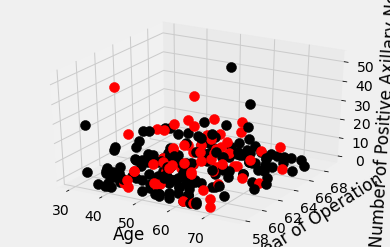

In [34]:
### Plot data   
train_set, test_set = dataset(full_data, empty_set, test_size)
Plot_KNN(train_set)